In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Simple Linear Regression

## Generate Data

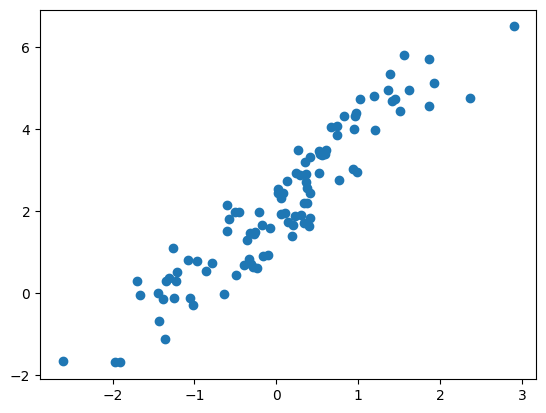

In [2]:
X = np.random.randn(100).reshape(-1, 1)
w = np.random.uniform(low=1, high=2, size=(100, 1))
b = np.random.uniform(low=1, high=3, size=(100, 1))
y = w * X + b
plt.scatter(X, y)

In [3]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


### Our goal is to find the line of best fit for the above data. This will be done using Gradient Descent and Backpropagation to find the most optimal weight and bias value

## Training Loop

In [4]:
def linear_regression(X, y, numb_epochs=1000, lr=1e-3):
    # initalize weight and bias
    w = np.random.randn(1, 1)
    b = np.zeros((1, 1))
    
    for epoch in range(numb_epochs):
        # Forward
        z = np.dot(X, w) + b
        
        # Calculate Mean Squared Error Loss
        loss = np.mean((z - y) ** 2)
        if (epoch+1) % 100 == 0:
            print(f"Epoch: {epoch+1}, loss: {loss:.5f}")
        
        # Calculate Gradients (Backpropagation)
        dL_dz = 2 * (z - y)
        dz_dw = X.T
        dL_dw = np.dot(dz_dw, dL_dz) / X.shape[0]
        
        dz_db = 1
        dL_db = np.sum(dz_db * dL_dz, axis=0) / X.shape[0]
        
        # Make Step (Gradient Descent)
        w = w - lr * dL_dw
        b = b - lr * dL_db
    return w, b

In [5]:
w, b = linear_regression(X, y, numb_epochs=2500, lr=1e-3)

Epoch: 100, loss: 4.91832
Epoch: 200, loss: 3.33058
Epoch: 300, loss: 2.29896
Epoch: 400, loss: 1.62854
Epoch: 500, loss: 1.19278
Epoch: 600, loss: 0.90949
Epoch: 700, loss: 0.72529
Epoch: 800, loss: 0.60548
Epoch: 900, loss: 0.52754
Epoch: 1000, loss: 0.47682
Epoch: 1100, loss: 0.44382
Epoch: 1200, loss: 0.42233
Epoch: 1300, loss: 0.40833
Epoch: 1400, loss: 0.39922
Epoch: 1500, loss: 0.39328
Epoch: 1600, loss: 0.38940
Epoch: 1700, loss: 0.38688
Epoch: 1800, loss: 0.38523
Epoch: 1900, loss: 0.38416
Epoch: 2000, loss: 0.38346
Epoch: 2100, loss: 0.38300
Epoch: 2200, loss: 0.38270
Epoch: 2300, loss: 0.38250
Epoch: 2400, loss: 0.38238
Epoch: 2500, loss: 0.38229


In [6]:
preds = np.dot(X, w) + b

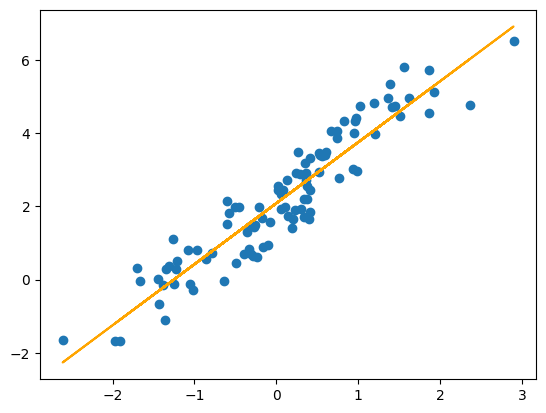

In [7]:
plt.scatter(X, y)
plt.plot(X, preds, color="orange")

### As we can see, the line is drawn by connecting the model's predictions given the inputs using the most optimal weight and bias value. The line can be interpreted as the line of best fit for this data.

# 2 Layer Neural Network for Binary Classification (1 Hidden Layer)

## Generate Data

In [248]:
X, y = datasets.make_moons(n_samples=10000, shuffle=True, noise=0.17)
# X, y = datasets.make_circles(n_samples=10000, shuffle=True, noise=0.07)
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [9]:
points = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=y.flatten()))
points.head()

,x1,x2,label
0,1.551257,-0.587335,1
1,1.605462,0.369268,1
2,0.612322,-0.708847,1
3,1.871884,0.594456,1
4,0.577379,-0.255273,1


## Plotting the Data

### As you can see there are 2 classes color coded with green and blue. There is some overlap of the points and so we expect the model to classify most points correctly but there will be some discrepencies because of the noise in the data

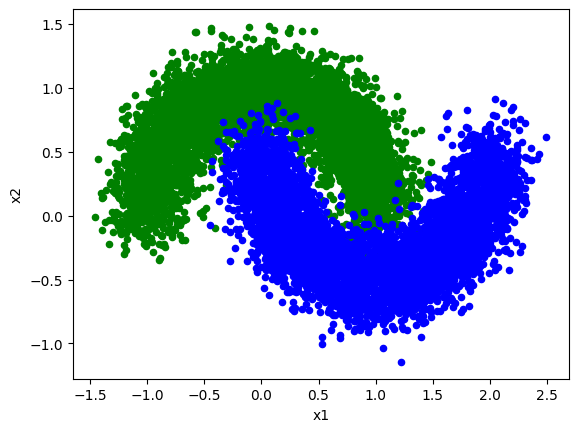

In [10]:
fig, axis = plt.subplots()
colors = {0: "green", 1: "blue"}

for key, group in points.groupby("label"):
    group.plot(ax=axis, kind="scatter", x="x1", y="x2", color=colors[key])
    
plt.show()

### There are two ways to approach this binary classification problem:
1) We could either have 1 output neuron and just use a final sigmoid activation layer and interpret it as the probability that the prediction belongs to one of the classes. Since it is binary classification, the probablity of the prediction being the other class would be 1 - P, where P is the probability of one of the classes. This method would use a Binary Cross Entropy Loss function.

2) Another way is to have 2 output neurons (one for each class), and use a final softmax activation layer and interpret this as the probability that the prediction belongs to the specific classes. This method would use a Cross Entropy Loss function.

I decided to use method 2 since the formula for Cross Entropy Loss is much simpler and in backpropagation, calculating partial derivatives is also easier when paired with the Softmax Activation function.

In [249]:
ohe_y = np.zeros((y.size, 2))
ohe_y[np.arange(y.size), y] = 1
y = ohe_y
print(y.shape)

(10000, 2)


## Activation functions and their derivatives that will be used during forward and backpropagation

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [14]:
def relu(x):
    return np.maximum(x, 0)

In [15]:
def relu_derivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

In [16]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)

## Training Loop

In [17]:
def train_2layer_nnet(X, y, numb_epochs=1000, lr=1e-3):
    # randomly initialize weights and biases
    numb_input_nodes, numb_h_nodes, numb_output_nodes = 2, 6, 2
    a0 = X # (n, 2)
    w1 = np.random.randn(numb_input_nodes, numb_h_nodes)# (2, 6)
    b1 = np.zeros((1, numb_h_nodes)) # (1, 6) broadcasting will take care of first dimension
    w2 = np.random.randn(numb_h_nodes, numb_output_nodes) # (6, 2)
    b2 = np.zeros((1, numb_output_nodes)) # (1, 2) broadcasting will take care of first dimension
    
    for epoch in range(numb_epochs):
        # Forward
        
        # First Layer Forward
        z1 = np.dot(a0, w1) + b1 # (n, 6)
        a1 = relu(z1) # (n, 6)

        # Second Layer Forward
        z2 = np.dot(a1, w2) + b2 # (n, 2)
        a2 = softmax(z2) # (n, 2)
                
        # Calculate Cross Entropy Loss
        loss = np.mean(np.sum(-1 * y * np.log(a2 + 1e-7), axis=1))
        if (epoch+1) % 1000 == 0:
            print(f"Epoch: {epoch+1}, loss: {loss:.5f}")
                    
        # Calculate Gradients (Backpropagation)
        
        # Second Layer
        dL_dz2 = a2 - y # Combined partial derivative for both Cross Entropy and Softmax
        
        dz2_dw2 = a1.T # (6, n)
        dz2_db2 = 1
        dL_dw2 = np.dot(dz2_dw2, dL_dz2) / a1.shape[0] # (6, 2)
        dL_db2 = np.sum(dz2_db2 * dL_dz2, axis=0) / a1.shape[0] # (1, 2)
        
        dz2_da1 = w2.T # (2, 6)
        
        # First Layer
        dL_da1 = np.dot(dL_dz2, dz2_da1) # (n, 6)
        da1_dz1 = relu_derivative(z1) # (n, 6)
        dL_dz1 = dL_da1 * da1_dz1 # (n, 6)
        
        dz1_dw1 = a0.T # (2, n)
        dz1_db1 = 1
        dL_dw1 = np.dot(dz1_dw1, dL_dz1) / a0.shape[0] # (2, 6)
        dL_db1 = np.sum(dz1_db1 * dL_dz1, axis=0) / a0.shape[0] # (1, 6)
        
        # Make Step with Gradients (Gradient Descent)
        
        # Second Layer
        w2 = w2 - lr * dL_dw2
        b2 = b2 - lr * dL_db2
                
        # First Layer
        w1 = w1 - lr * dL_dw1
        b1 = b1 - lr * dL_db1
        
    return w1, b1, w2, b2

In [18]:
w1, b1, w2, b2 = train_2layer_nnet(X, y, 5000, 1e-1)

Epoch: 1000, loss: 0.17398
Epoch: 2000, loss: 0.08053
Epoch: 3000, loss: 0.06163
Epoch: 4000, loss: 0.05549
Epoch: 5000, loss: 0.05271


Sometimes, depending on the random initialization, the model may not be able to train and get stuck, so re-running the training loop will start over with a new model that may be better randomly initialized. Loss should be around 0.05

## Evaluating the accuracy of the model

In [19]:
a0 = X # (n, 2)

# First Layer Forward
z1 = np.dot(a0, w1) + b1 # (n, 6)
a1 = relu(z1) # (n, 6)

# Second Layer Forward
z2 = np.dot(a1, w2) + b2 # (n, 2)
a2 = softmax(z2) # (n, 2)

preds = a2

In [20]:
total = y.shape[0]
correct = (np.argmax(y, axis=1) == np.argmax(preds, axis=1)).sum()
print(f"The model got {correct} out of {total} correct: {100 * (correct / total):.3f}%")

The model got 9813 out of 10000 correct: 98.130%


### Returns a DataFrame with the value 2 if the prediction and the labels differ for any input

In [21]:
def find_differences(preds, y):
    diff = np.copy(preds)
    diff[preds != y] = 2
    return diff

In [22]:
diff = find_differences(np.argmax(preds, axis=1), np.argmax(y, axis=1))
diff_df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=diff.flatten()))

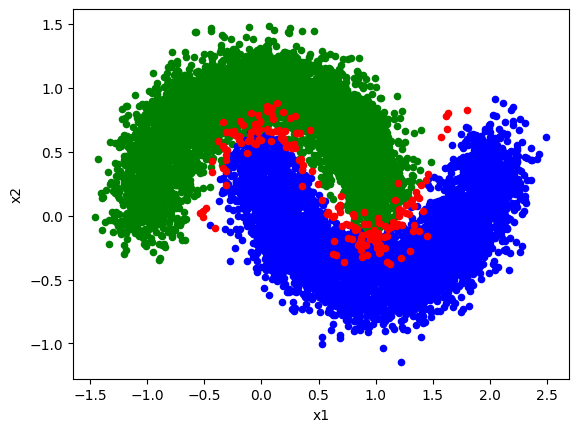

In [23]:
fig, axis = plt.subplots()
colors = {0: "green", 1: "blue", 2: "red"}
for key, group in diff_df.groupby("label"):
    group.plot(ax=axis, kind="scatter", x="x1", y="x2", color=colors[key])
    
plt.show()

### As we can see, the vast majority of points were classified correctly into their respective classes, but the points that were overlapped and on the edges were misclassified (in red). This is expected since there is some overlap in the data and it is difficult to make a clear judgement on what class some points belong to.

# N Layer Neural Network for Classification/Regression

### The Custom N Layer Neural Network will be built using object instances of specific classes modeled after the Pytorch nn library (such as Linear, Sequential, etc.) 

In [24]:
class Linear:
    def __init__(self, in_features, out_features, bias=True):
        self.weights = np.random.randn(in_features, out_features)
        self.biases = np.zeros((1, out_features)) # broadcasting will take care of first dimension
        self.inputs = 0
        self.dw = 0
        self.db = 0
        self.v_dw = 0
        self.v_db = 0
        
    def forward(self, x):
        self.inputs = x
        z = np.dot(x, self.weights) + self.biases
        return z
    
    def backward(self, dz):
        dz_dw = self.inputs.T
        dz_db = 1
        
        # Accumulate Gradients
        self.dw += np.dot(dz_dw, dz) / self.inputs.shape[0]
        self.db += np.sum(dz_db * dz, axis=0) / self.inputs.shape[0]
        
        # Compute da to be passed back to the previous layer
        dz_da = self.weights.T
        da = np.dot(dz, dz_da)
        return da
    
    def step(self, lr=1e-3, momentum=0):
        # Check if Momentum should be used
        if momentum <= 0:
            # Calculate Step without Momentum
            self.v_dw = self.dw
            self.v_db = self.db
        else:
            # Calculate Step with Momentum 
            self.v_dw = momentum * self.v_dw + (1 - momentum) * self.dw
            self.v_db = momentum * self.v_db + (1 - momentum) * self.db
        
        # Make Update
        self.weights -= lr * self.v_dw
        self.biases -= lr * self.v_db
    
    def zero_grad(self):
        self.dw = 0
        self.db = 0
    
    def __call__(self, x):
        return self.forward(x)

In [25]:
class Sigmoid:
    def __init__(self):
        self.inputs = 0
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, x):
        self.inputs = x
        return self.sigmoid(x)
    
    def backward(self, da):
        da_dz = self.sigmoid(self.inputs) * (1 - self.sigmoid(self.inputs))
        dz = da * da_dz
        return dz
    
    def step(self, lr=1e-3, momentum=0.9):
        pass
    
    def zero_grad(self):
        pass
    
    def __call__(self, x):
        return self.forward(x)

In [106]:
class Softmax:
    def __init__(self):
        pass
    
    def softmax(self, x):
#         exp = np.exp(x)
        exp = np.exp(x - np.max(x, axis=1).reshape(-1, 1))
        return exp / np.sum(exp, axis=1).reshape(-1, 1)
    
    def forward(self, x):
        return self.softmax(x)
    
    def __call__(self, x):
        return self.forward(x)

In [27]:
class ReLU:
    def __init__(self):
        self.inputs = 0
    
    def forward(self, x):
        self.inputs = x
        return np.maximum(x, 0)
    
    def backward(self, da):
        da_dz = np.ones(self.inputs.shape)
        da_dz[self.inputs <= 0] = 0
    
        dz = da * da_dz
        return dz
    
    def step(self, lr=1e-3, momentum=0.9):
        pass
    
    def zero_grad(self):
        pass
    
    def __call__(self, x):
        return self.forward(x)

In [28]:
class Sequential:
    def __init__(self, layers):
        self.layers = layers
        
    def forward(self, x):
        curr_input = x
        for layer in self.layers: # forward propagation on each layer from first to last layer
            out = layer.forward(curr_input)
            curr_input = out
            
        return out
    
    def backward(self, da):
        next_grad = da
        for layer in reversed(self.layers): # backward propagation on each layer from last to first layer
            next_grad = layer.backward(next_grad)
            
    def step(self, lr=1e-3, momentum=0.9):
        for layer in reversed(self.layers): # make a step using the calculated gradients from backpropagation
            layer.step(lr, momentum)
    
    def zero_grad(self):
        for layer in self.layers: # zero out the gradients in each layer
            layer.zero_grad()
            
    def __call__(self, x):
        return self.forward(x)

In [29]:
class MeanSquaredErrorLoss:
    def __init__(self, model):
        self.y_hat = 0
        self.y = 0
        self.model = model
        self.loss = 0
        
    def forward(self, y_hat, y):
        self.y_hat = y_hat
        self.y = y
        self.loss = np.mean((y_hat - y) ** 2)
        return self
    
    def backward(self):
        da = 2 * (self.y_hat - self.y)
        self.model.backward(da)
    
    def step(self):
        pass
    
    def zero_grad(self):
        pass
    
    def item(self):
        return self.loss
    
    def __call__(self, y_hat, y):
        return self.forward(y_hat, y)
    
    def __str__(self):
        return str(self.loss)

In [108]:
class CrossEntropyLoss:
    def __init__(self, model):
        self.y_hat = 0
        self.y = 0
        self.model = model
        self.loss = 0
        
    def softmax(self, x):
#         exp = np.exp(x)
        exp = np.exp(x - np.max(x, axis=1).reshape(-1, 1))
        return exp / np.sum(exp, axis=1).reshape(-1, 1)
        
    def forward(self, x, y):
        self.y_hat = self.softmax(x) # do a softmax to get predictions
        self.y = y
        self.loss = np.mean(np.sum(-1 * y * np.log(self.y_hat + 1e-7), axis=1))
        return self
    
    def backward(self):
        dz = self.y_hat - self.y # Combined partial derivative for both Cross Entropy and Softmax
        self.model.backward(dz)
    
    def step(self):
        pass
    
    def zero_grad(self):
        pass
    
    def item(self):
        return self.loss
    
    def __call__(self, y_hat, y):
        return self.forward(y_hat, y)
    
    def __str__(self):
        return str(self.loss)

In [31]:
class Optimizer:
    def __init__(self, model, lr=1e-3, momentum=0.9):
        self.model = model
        self.lr = lr
        self.momentum = momentum
        
    def zero_grad(self):
        self.model.zero_grad()
        
    def step(self):
        self.model.step(self.lr, self.momentum)

## Training Loop

In [109]:
def train_nlayer_nnet(X, y, model, numb_epochs=1000, lr=1e-3, momentum=0.9):
    
    loss_fn = CrossEntropyLoss(model)
    optimizer = Optimizer(model, lr=lr, momentum=momentum)
    
    for epoch in range(numb_epochs+1):
        # Zero Out Gradients
        optimizer.zero_grad()
        
        # Forward
        preds = model(X)
        
        # Calculate Loss
        loss = loss_fn(preds, y)
        if (epoch+1) % 100 == 0:
            print(f"Epoch: {epoch+1}, loss: {loss.item():.5f}")
        
        # Calculate Gradients (Backpropagation)
        loss.backward()
        
        # Make Step with Gradients (Gradient Descent)
        optimizer.step()
        
    return model

## Create Model

In [250]:
model = Sequential([
    Linear(2, 6),
    ReLU(),
    Linear(6, 2),
])

In [251]:
model = train_nlayer_nnet(X, y, model, numb_epochs=5000, lr=1e-1, momentum=0.9)

Epoch: 100, loss: 0.29039
Epoch: 200, loss: 0.25858
Epoch: 300, loss: 0.23761
Epoch: 400, loss: 0.21789
Epoch: 500, loss: 0.19817
Epoch: 600, loss: 0.17952
Epoch: 700, loss: 0.16225
Epoch: 800, loss: 0.14669
Epoch: 900, loss: 0.13321
Epoch: 1000, loss: 0.12176
Epoch: 1100, loss: 0.11214
Epoch: 1200, loss: 0.10409
Epoch: 1300, loss: 0.09733
Epoch: 1400, loss: 0.09161
Epoch: 1500, loss: 0.08678
Epoch: 1600, loss: 0.08269
Epoch: 1700, loss: 0.07919
Epoch: 1800, loss: 0.07615
Epoch: 1900, loss: 0.07350
Epoch: 2000, loss: 0.07115
Epoch: 2100, loss: 0.06909
Epoch: 2200, loss: 0.06727
Epoch: 2300, loss: 0.06564
Epoch: 2400, loss: 0.06416
Epoch: 2500, loss: 0.06282
Epoch: 2600, loss: 0.06163
Epoch: 2700, loss: 0.06053
Epoch: 2800, loss: 0.05952
Epoch: 2900, loss: 0.05858
Epoch: 3000, loss: 0.05767
Epoch: 3100, loss: 0.05684
Epoch: 3200, loss: 0.05605
Epoch: 3300, loss: 0.05521
Epoch: 3400, loss: 0.05428
Epoch: 3500, loss: 0.05340
Epoch: 3600, loss: 0.05255
Epoch: 3700, loss: 0.05180
Epoch: 380

Sometimes, depending on the random initialization, the model may not be able to train and get stuck, so creating a new model and re-running the training loop will start over with a new model that may be better randomly initialized. Loss should be around 0.05

## Evaluating the accuracy of the model

In [252]:
softmax = Softmax()
preds = softmax(model(X))

In [253]:
total = y.shape[0]
correct = (np.argmax(y, axis=1) == np.argmax(preds, axis=1)).sum()
print(f"The model got {correct} out of {total} correct: {100 * (correct / total):.3f}%")
# print("The model got", (np.argmax(y, axis=1) == np.argmax(preds, axis=1)).sum(), "out of", y.shape[0], "correct")

The model got 9835 out of 10000 correct: 98.350%


In [254]:
diff = find_differences(np.argmax(preds, axis=1), np.argmax(y, axis=1))
diff_df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=diff.flatten()))

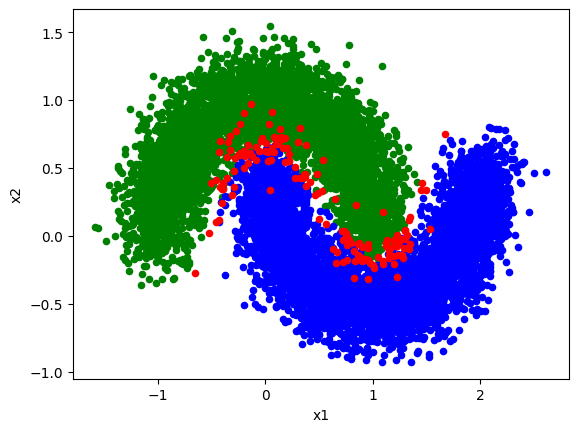

In [255]:
fig, axis = plt.subplots()
colors = {0: "green", 1: "blue", 2: "red"}
for key, group in diff_df.groupby("label"):
    group.plot(ax=axis, kind="scatter", x="x1", y="x2", color=colors[key])
    
plt.show()

### As before, the vast majority of points were classified correctly into their respective classes, but the points that were overlapped and on the edges were misclassified (in red). 

### Although in this particular example, the 2 layer neural network will suffice to classify the points properly, in other cases, a n-layer neural network will be needed (some layers may need additional neurons). The custom Pytorch Clone neural network library will aid in that as it gives the user control over making their own custom model.

In [311]:
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer["data"]
y = breast_cancer["target"]

In [337]:
wine = datasets.load_wine()
X = wine["data"]
y = wine["target"]

In [339]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [340]:
ohe_y = np.zeros((y.size, 3))
ohe_y[np.arange(y.size), y] = 1
y = ohe_y

In [341]:
print(X.shape)
print(y.shape)

(178, 13)
(178, 3)


In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

In [343]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(151, 13)
(151, 3)
(27, 13)
(27, 3)


In [344]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [349]:
model = Sequential([
    Linear(13, 3)
])

In [350]:
model = train_nlayer_nnet(X_train, y_train, model, numb_epochs=2000, lr=1e-1, momentum=0.9)

Epoch: 100, loss: 0.13320
Epoch: 200, loss: 0.07065
Epoch: 300, loss: 0.04995
Epoch: 400, loss: 0.03983
Epoch: 500, loss: 0.03363
Epoch: 600, loss: 0.02938
Epoch: 700, loss: 0.02627
Epoch: 800, loss: 0.02387
Epoch: 900, loss: 0.02195
Epoch: 1000, loss: 0.02038
Epoch: 1100, loss: 0.01905
Epoch: 1200, loss: 0.01791
Epoch: 1300, loss: 0.01692
Epoch: 1400, loss: 0.01605
Epoch: 1500, loss: 0.01528
Epoch: 1600, loss: 0.01459
Epoch: 1700, loss: 0.01397
Epoch: 1800, loss: 0.01340
Epoch: 1900, loss: 0.01289
Epoch: 2000, loss: 0.01242


In [351]:
softmax = Softmax()
y_pred = softmax(model(X_test))
y_pred_classes = y_pred.round()

In [352]:
total = y_test.shape[0]
correct = (np.argmax(y_test, axis=1) == np.argmax(y_pred_classes, axis=1)).sum()
print(f"The model got {correct} out of {total} correct: {100 * (correct / total):.3f}%")

The model got 27 out of 27 correct: 100.000%
